In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/train.csv", index_col='id')
df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.dropna(inplace=True)

In [5]:
df.drop_duplicates(keep='first', inplace=True)

In [6]:
x = df.drop('label', axis=1)
y = df['label']
len(x), len(y)

(18241, 18241)

In [7]:
messages = x.copy()
messages.reset_index(inplace=True)
messages[:5]

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [8]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stop_words = stopwords.words('english')
ps = PorterStemmer()

corpus = []
for i in range(0, len(messages)):
  reviews = re.sub('[^ a-zA-Z]', ' ', messages['title'][i])
  reviews = reviews.lower()
  reviews = reviews.split()

  reviews = [ps.stem(word) for word in reviews if word not in stop_words]
  reviews = " ".join(reviews)
  corpus.append(reviews)
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [10]:
from keras.layers import LSTM, Embedding
from keras import layers
from keras import models
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

In [11]:
vocab_size = 5000
 
one_hot_reviews = [one_hot(review, vocab_size) for review in corpus]
one_hot_reviews

[[1909, 1206, 227, 233, 4401, 888, 4557, 2044, 343, 1428],
 [1061, 2037, 3740, 1971, 4206, 3985, 263],
 [236, 2013, 1018, 240],
 [446, 760, 2329, 866, 42, 2867],
 [2984, 4206, 848, 1280, 1857, 2010, 4206, 3407, 3723, 2607],
 [4842,
  2746,
  1543,
  3782,
  2100,
  2770,
  1604,
  300,
  494,
  2650,
  2464,
  3767,
  812,
  3085,
  263],
 [1535, 2633, 3775, 2488, 2928, 3232, 4925, 4635, 1886, 1776, 3786],
 [4974, 4472, 60, 1846, 2826, 886, 2770, 1530, 1886, 1776, 3786],
 [898, 3686, 4108, 306, 1531, 2377, 2582, 3336, 2770, 3750],
 [842, 3668, 2116, 4788, 1378, 1276, 3237, 3854],
 [513, 2852, 1865, 204, 1521, 2838, 2152, 1289, 187, 3122, 1571],
 [866, 1420, 4401, 2377, 2770, 2826],
 [968, 2087, 4566, 3674, 338, 3750, 4954, 1447, 1148],
 [2922, 3608, 2838, 361, 1254, 4510, 3940, 1886, 1776, 3786],
 [1993, 4777, 4509, 1303, 3406, 1886, 1776, 3786],
 [1052, 2295, 4280, 4318, 2548, 1278, 100, 2640, 2531, 4045],
 [2578, 2251, 2037],
 [4796, 566, 1263, 4661, 2770, 4575, 2980, 263],
 [1677, 9

In [12]:
leng = []
for i in one_hot_reviews:
  leng.append(len(i))
max(leng)

47

In [13]:
max_length = 47

padded_reviews = pad_sequences(one_hot_reviews, padding='post', maxlen=max_length)
padded_reviews[:5]

array([[1909, 1206,  227,  233, 4401,  888, 4557, 2044,  343, 1428,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [1061, 2037, 3740, 1971, 4206, 3985,  263,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 236, 2013, 1018,  240,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 446,  760, 2329,  866,

In [14]:
feature_size = 8

model = models.Sequential()
model.add(Embedding(vocab_size, feature_size, input_length=max_length))
model.add(LSTM(units=100))
model.add(layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 47, 8)             40000     
_________________________________________________________________
lstm (LSTM)                  (None, 100)               43600     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 83,701
Trainable params: 83,701
Non-trainable params: 0
_________________________________________________________________


In [15]:
y = np.array(y)
type(y)

numpy.ndarray

In [16]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(padded_reviews, y, test_size=0.25, random_state=42)
x_train.shape, x_test.shape

((13680, 47), (4561, 47))

In [17]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
    )
h = model.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    batch_size=64, 
    epochs=10
    )

Epoch 1/10
214/214 [==============================] - 17s 68ms/step - loss: 0.6676 - acc: 0.5869 - val_loss: 0.2516 - val_acc: 0.8991
Epoch 2/10
214/214 [==============================] - 14s 64ms/step - loss: 0.1891 - acc: 0.9237 - val_loss: 0.2016 - val_acc: 0.9222
Epoch 3/10
214/214 [==============================] - 14s 64ms/step - loss: 0.1229 - acc: 0.9561 - val_loss: 0.2190 - val_acc: 0.9154
Epoch 4/10
214/214 [==============================] - 14s 65ms/step - loss: 0.0885 - acc: 0.9708 - val_loss: 0.2498 - val_acc: 0.9127
Epoch 5/10
214/214 [==============================] - 14s 65ms/step - loss: 0.0848 - acc: 0.9736 - val_loss: 0.2781 - val_acc: 0.9112
Epoch 6/10
214/214 [==============================] - 14s 65ms/step - loss: 0.0710 - acc: 0.9788 - val_loss: 0.2615 - val_acc: 0.9114
Epoch 7/10
214/214 [==============================] - 14s 66ms/step - loss: 0.0612 - acc: 0.9825 - val_loss: 0.2946 - val_acc: 0.9051
Epoch 8/10
214/214 [==============================] - 14s 66ms

In [24]:
model.evaluate(x_test, y_test)

143/143 [==============================] - 2s 13ms/step - loss: 0.4051 - acc: 0.8989


[0.4050661027431488, 0.8989256620407104]

In [18]:
dr=pd.DataFrame(h.history)
dr.head()

,loss,acc,val_loss,val_acc
0,0.570228,0.662208,0.251644,0.899145
1,0.184675,0.926681,0.201575,0.922166
2,0.128481,0.953070,0.219022,0.915369
3,0.100539,0.965570,0.249775,0.912738
4,0.091597,0.969737,0.278111,0.911204


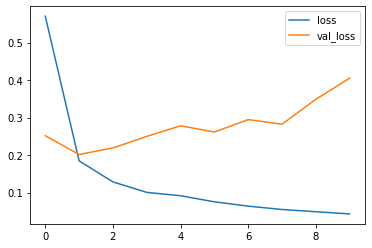

In [19]:
dr.loc[:, ['loss', 'val_loss']].plot()

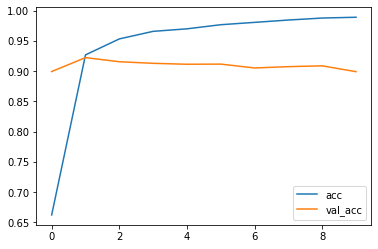

In [20]:
dr.loc[:, ['acc', 'val_acc']].plot()

In [21]:
y_pred = model.predict_classes(x_test)
y_pred[:10]

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [22]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

Accuracy : 0.8989256741942556
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2596
           1       0.90      0.87      0.88      1965

    accuracy                           0.90      4561
   macro avg       0.90      0.89      0.90      4561
weighted avg       0.90      0.90      0.90      4561



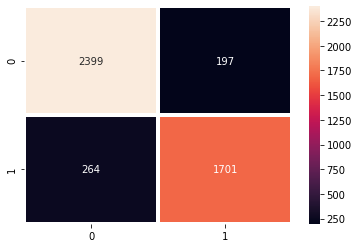

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, lw=3, fmt='d')

print('Accuracy :',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))